# Data description

The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

# Importing required Libraries

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [118]:
df=pd.read_csv('bigdatamart.csv')

In [117]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.300,1.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,8.0,5.920,2.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,662.0,17.500,1.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,1121.0,19.200,2.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800
4,1297.0,8.930,1.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,1.0,0.056783,13.0,214.5218,1.0,1987,0.0,2.0,1.0,2778.3834
8519,897.0,8.380,2.0,0.046982,0.0,108.1570,7.0,2002,1.0,1.0,1.0,549.2850
8520,1357.0,10.600,1.0,0.035186,8.0,85.1224,6.0,2004,2.0,1.0,1.0,1193.1136
8521,681.0,7.210,2.0,0.145221,13.0,103.1332,3.0,2009,1.0,2.0,2.0,1845.5976


In [119]:
df.shape

(8523, 12)

we have 8523 rows and 12 columns

In [120]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Itemweight and Outlet size has got null values

In [121]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

we have too many datatypes as object, we need to convert them

In [122]:
df['Outlet_Size'] = df['Outlet_Size'].replace(np.NaN,df['Outlet_Size'].mode().iloc[0])

<AxesSubplot:xlabel='Item_Weight'>

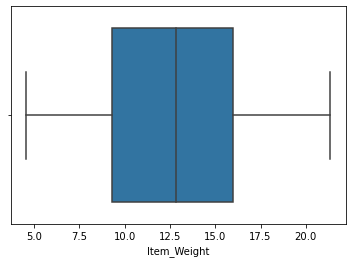

In [123]:
sns.boxplot(df_train['Item_Weight'])

From this, we understand that there are no outliers in Item_weight, hence we can replace the outliers with mean.

In [124]:
df['Item_Weight'] = df['Item_Weight'].replace(np.NaN,df['Item_Weight'].mean())

In [125]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Making the dataframe for nominal data

In [28]:
df_nominal=df[['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type',
              'Outlet_Type']].copy()

In [29]:
df_nominal

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [13]:
df_nominal['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
FDT07     9
FDG09     9
DRN47     9
         ..
FDT35     1
FDY43     1
FDN52     1
FDK57     1
FDE52     1
Name: Item_Identifier, Length: 1559, dtype: int64

So there are total 1559 items identified

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


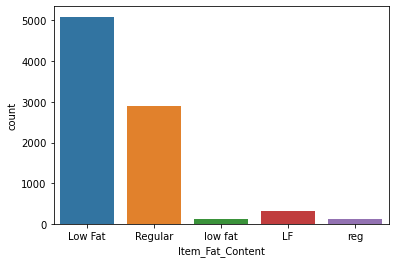

In [16]:
sns.countplot(df_nominal['Item_Fat_Content'])
print(df_nominal['Item_Fat_Content'].value_counts())

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


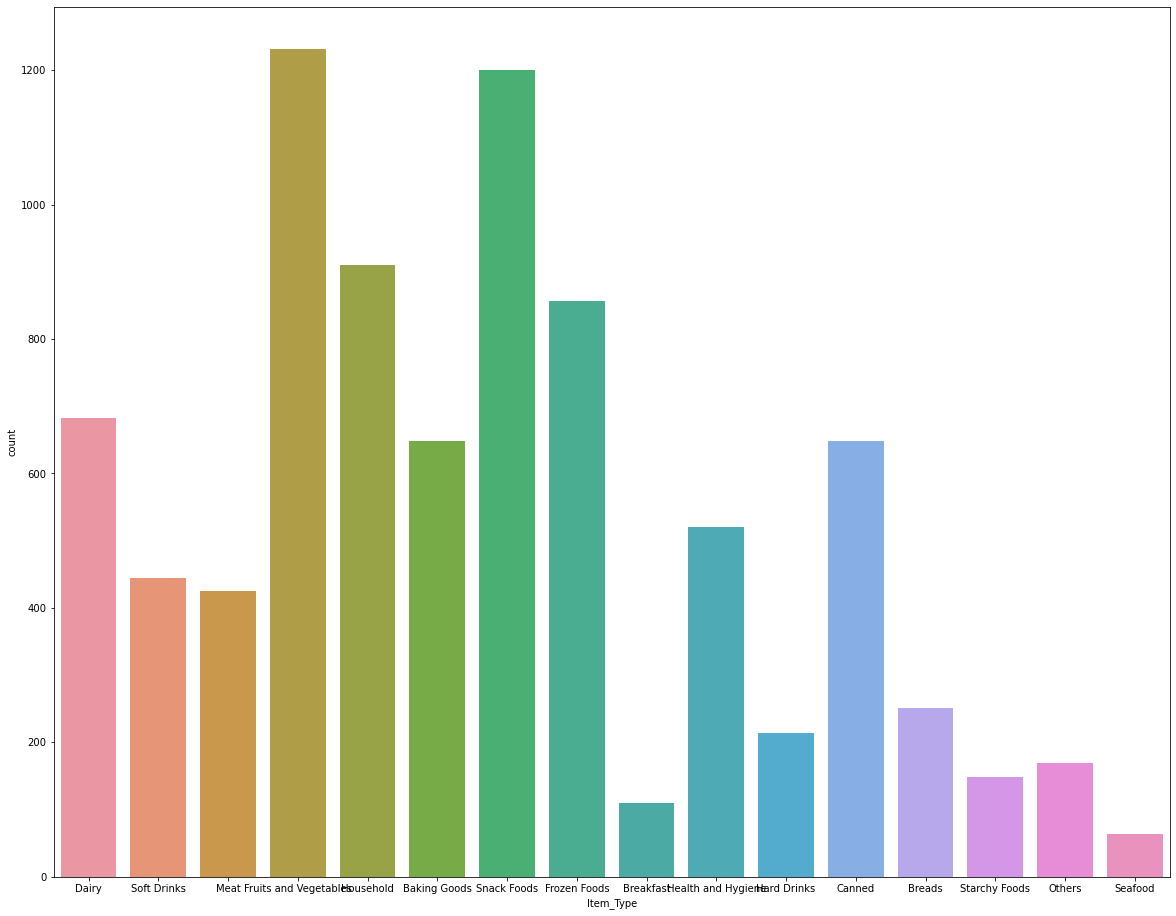

In [20]:
plt.figure(figsize=[20,16])
sns.countplot(df_nominal['Item_Type'])
print(df_nominal['Item_Type'].value_counts())

We can observe that Fruits and vegetables have got the highest Sale and Seafood has got the lowest sale.

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


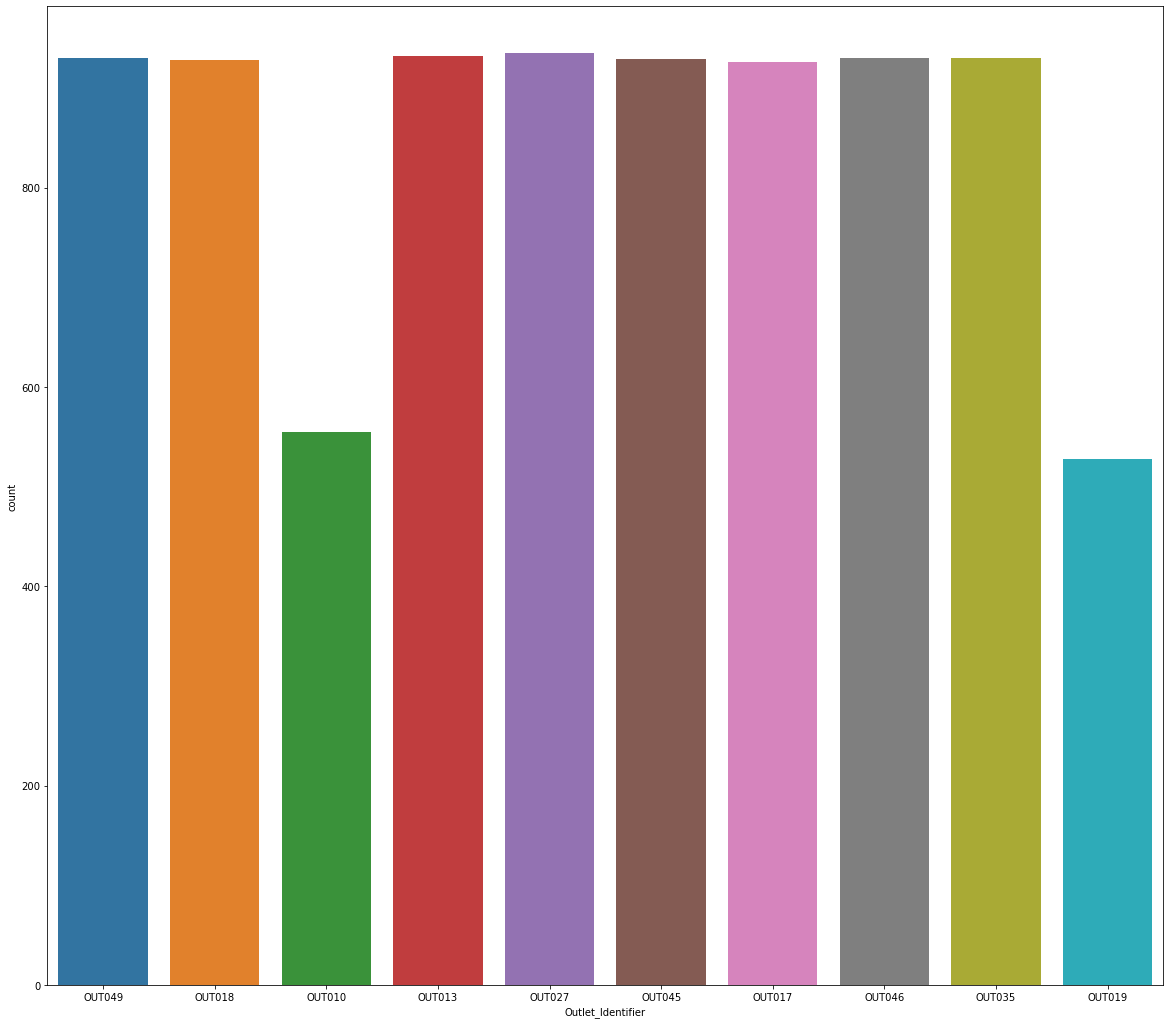

In [21]:
plt.figure(figsize=[20,18])
sns.countplot(df_nominal['Outlet_Identifier'])
print(df_nominal['Outlet_Identifier'].value_counts())

OUT027 has got highest outlet identifer

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64


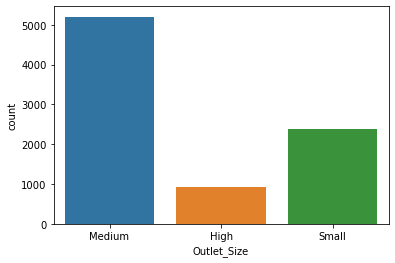

In [30]:
sns.countplot(df_nominal['Outlet_Size'])
print(df_nominal['Outlet_Size'].value_counts())

so there maximum medium size outlets

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


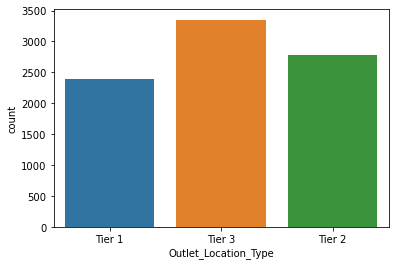

In [31]:
sns.countplot(df_nominal['Outlet_Location_Type'])
print(df_nominal['Outlet_Location_Type'].value_counts())

Maximum outlets are in tier 3

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


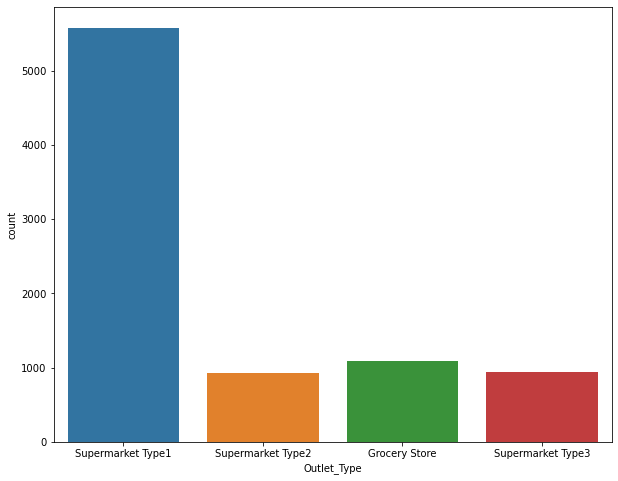

In [34]:
plt.figure(figsize=[10,8])
sns.countplot(df_nominal['Outlet_Type'])
print(df_nominal['Outlet_Type'].value_counts())

Maximum sales is from Supermarket type1

In [39]:
df_t=df.drop('Item_Outlet_Sales',axis=1)

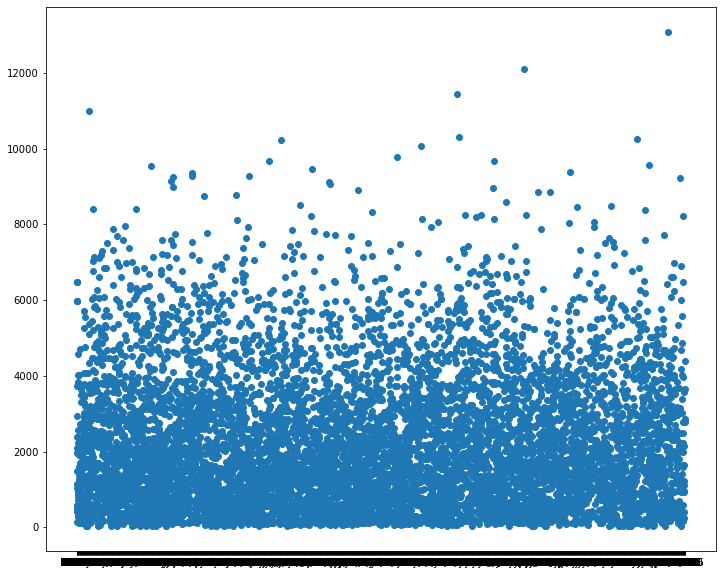

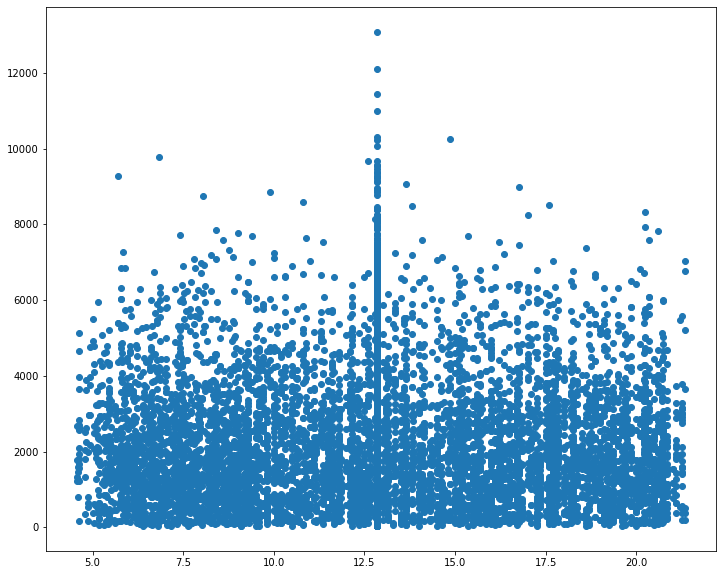

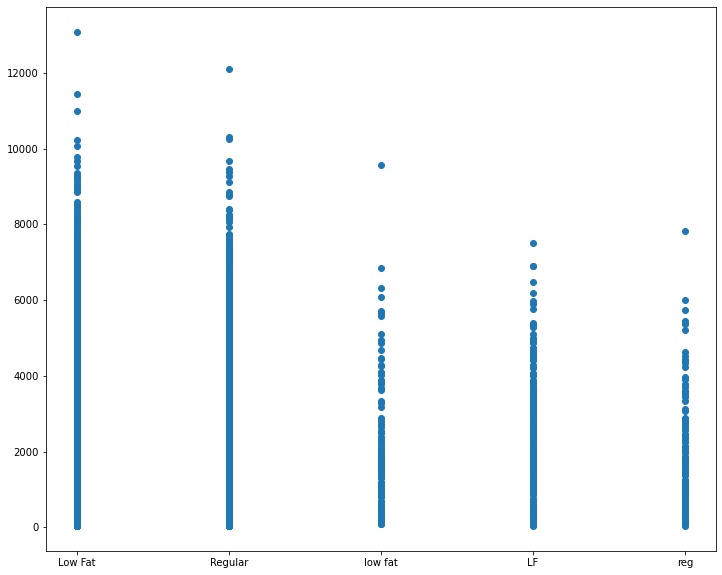

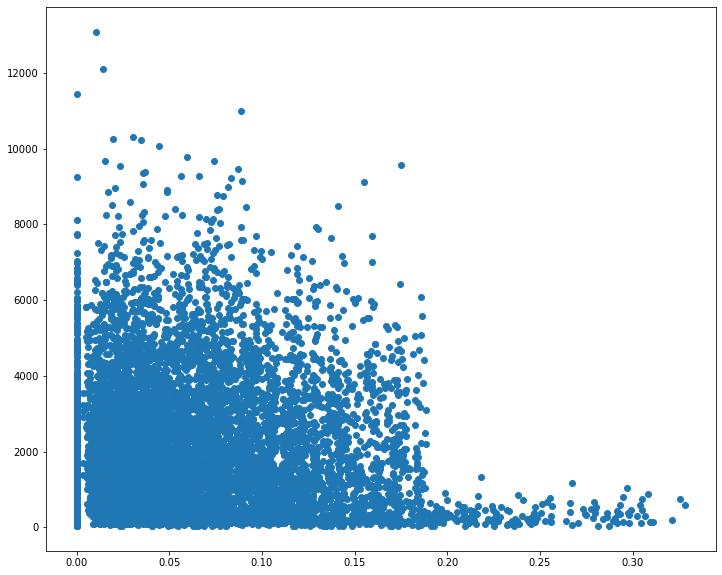

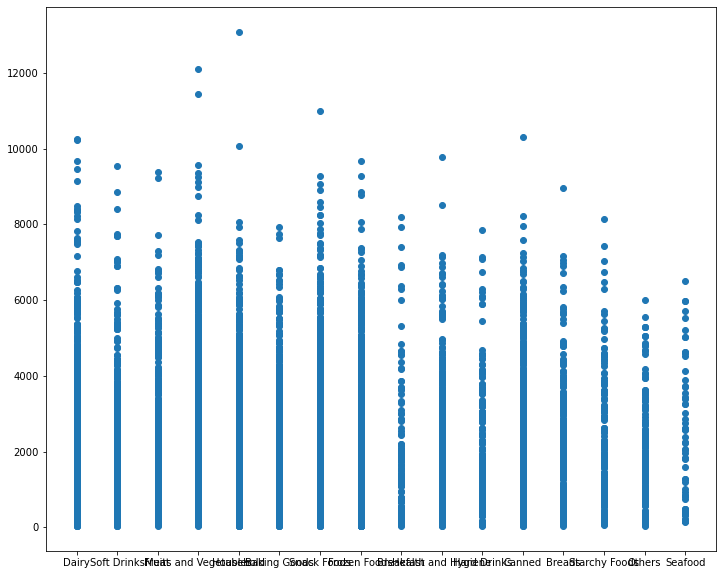

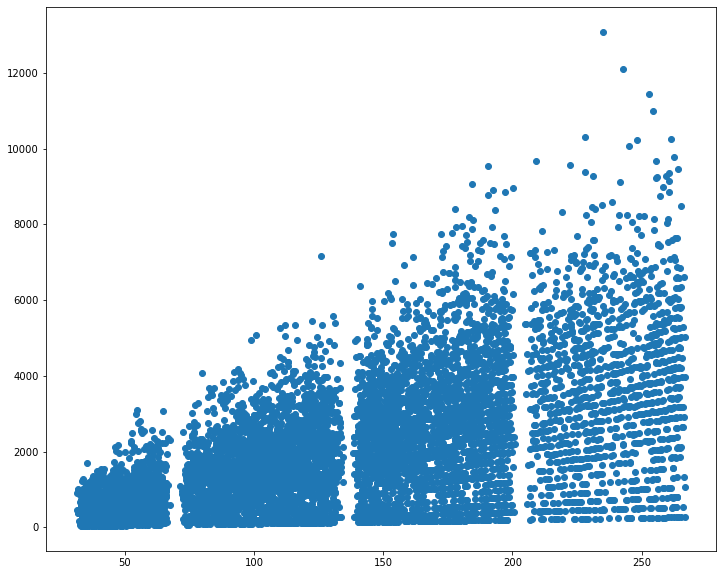

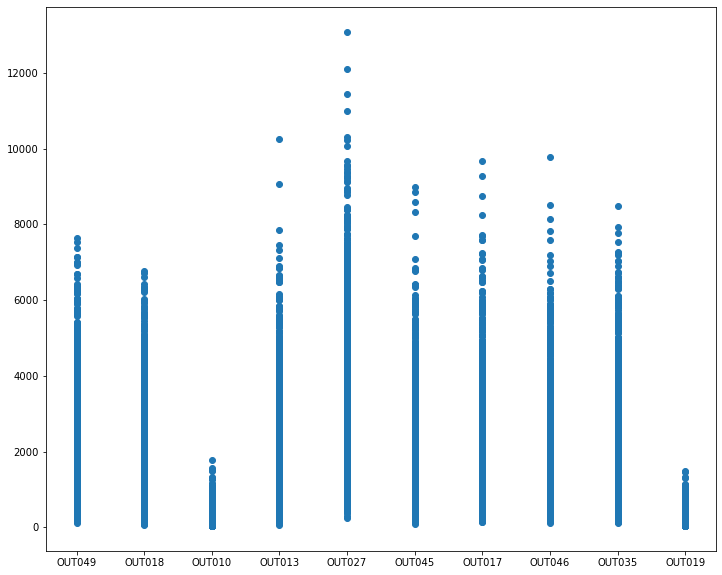

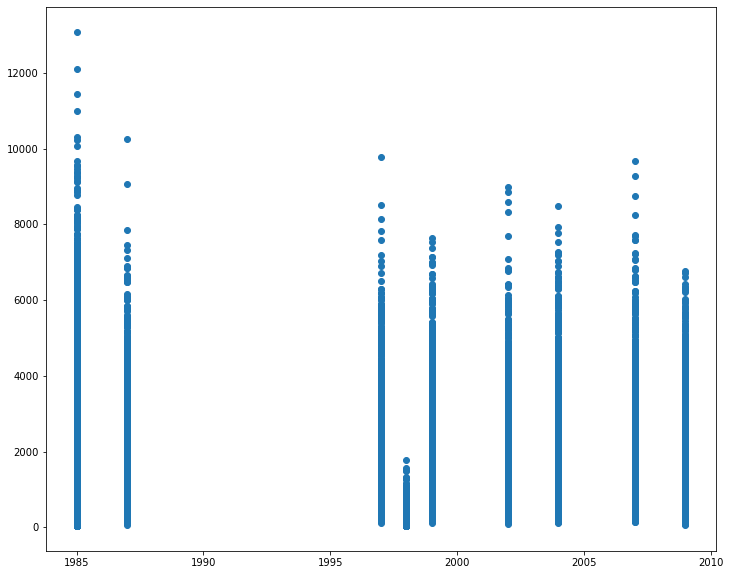

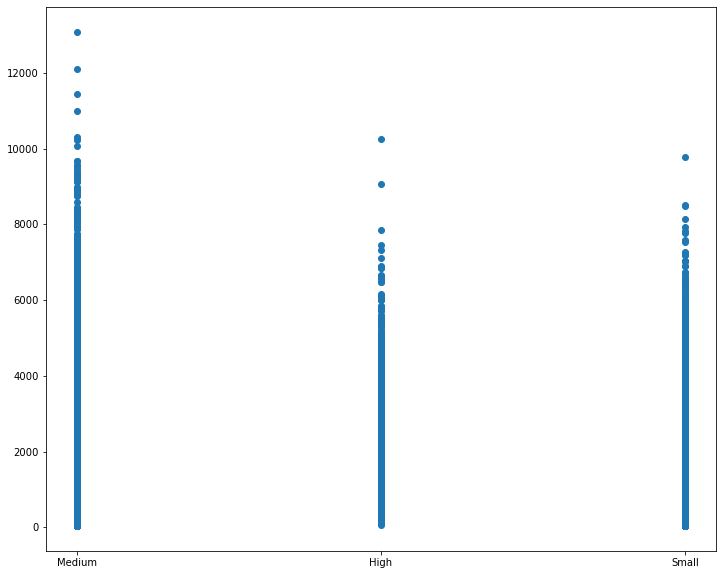

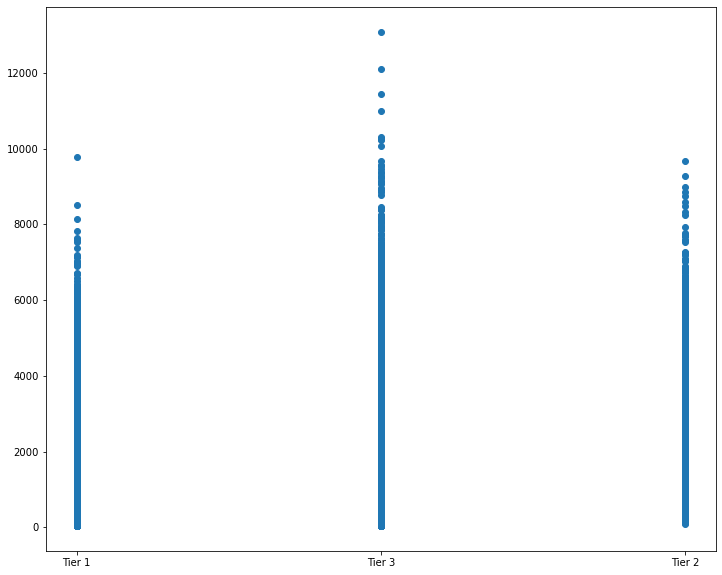

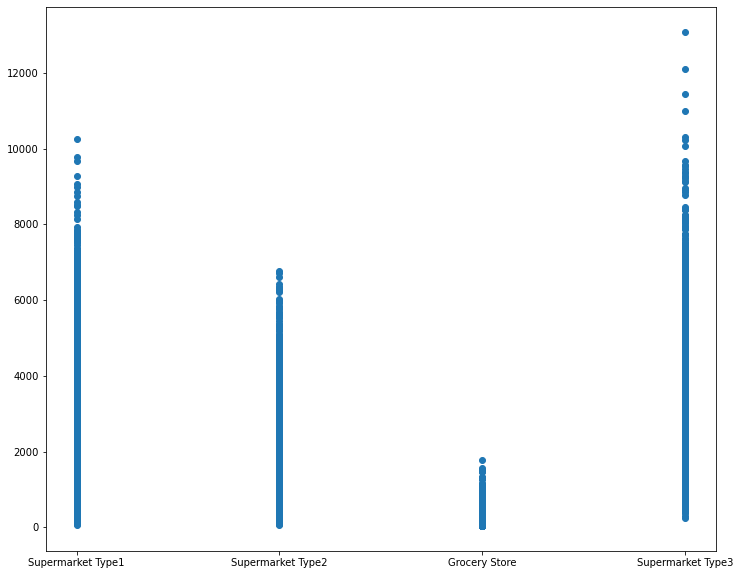

In [40]:
for i in df_t:
    plt.figure(figsize=[12,10])
    plt.scatter(x=df[i],y=df['Item_Outlet_Sales'])
    plt.show

# Encoding the dataframe

In [45]:
from sklearn.preprocessing import OrdinalEncoder

In [46]:
enc=OrdinalEncoder()

In [116]:
for i in df:
    if df[i].dtypes == 'object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [49]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.30,1.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,8.0,5.92,2.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,662.0,17.50,1.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,1121.0,19.20,2.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800
4,1297.0,8.93,1.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052


# Checking the Outliers

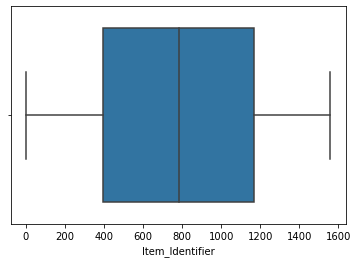

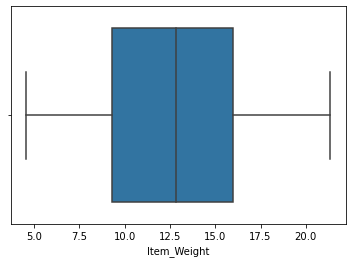

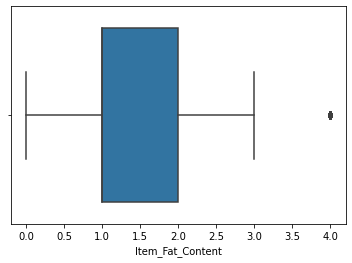

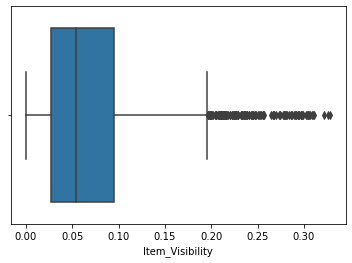

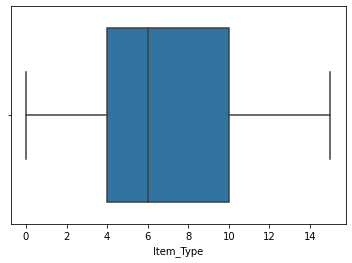

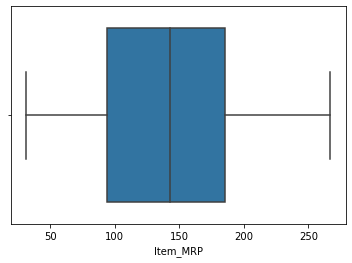

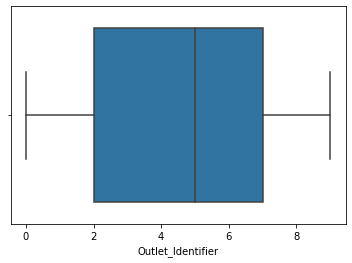

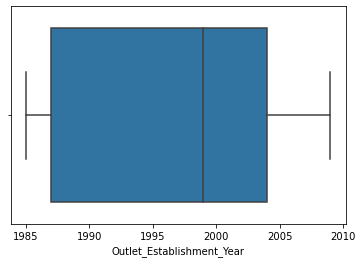

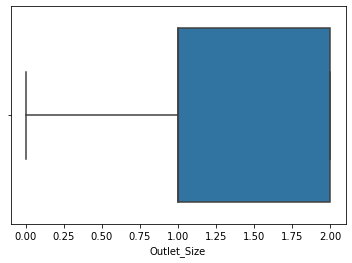

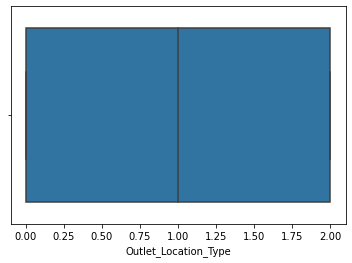

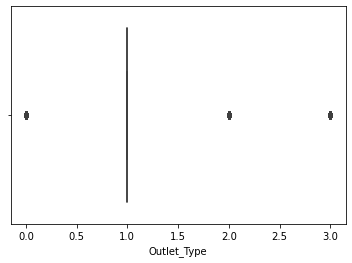

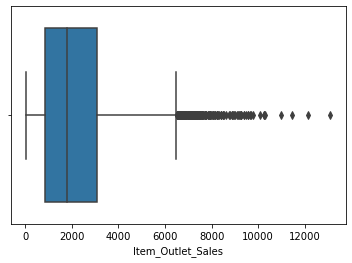

In [53]:
for i in df[columns]:
    sns.boxplot(df[i])
    plt.show()

We have outliers in few columns

# Checking the correlation

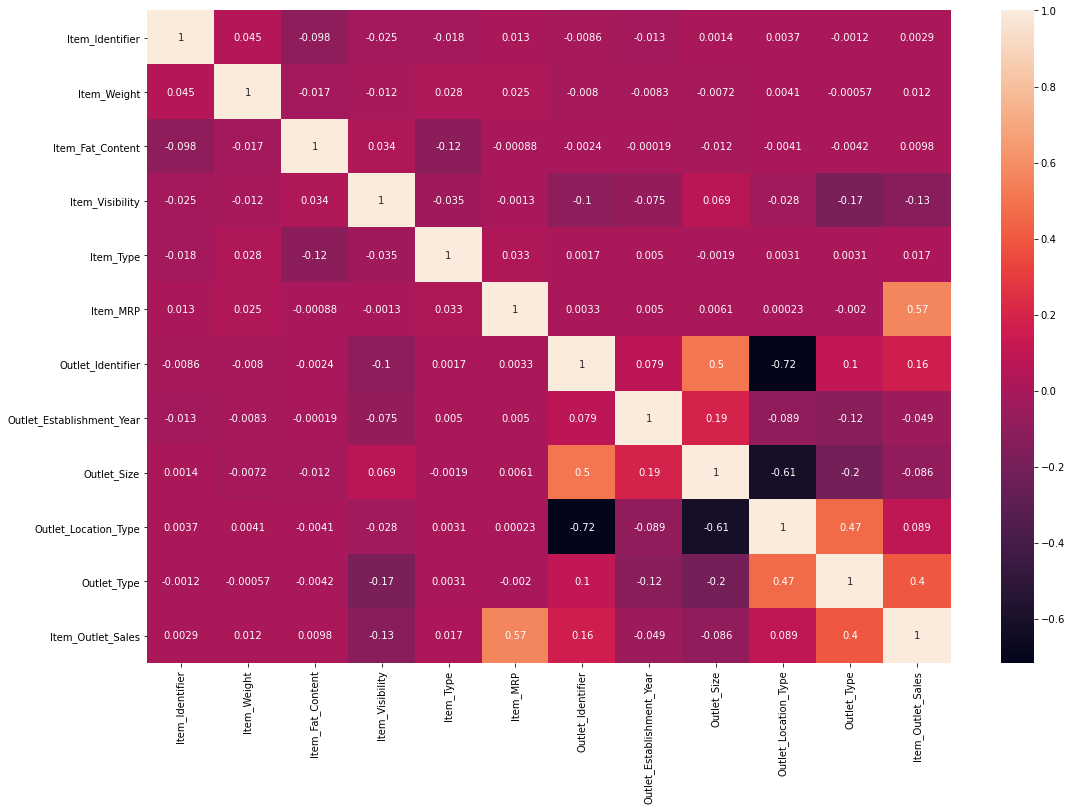

In [54]:
plt.figure(figsize=[18,12])
sns.heatmap(df.corr(),annot=True)
plt.show()

Observation:
- Item_MRP is correlated with Item_Outlet_sales
- Outlet identifier is correlated with Outlet_size and its negatively correlated with Outlet_Location_type.
- Outlet size is negatively correlated to Outlet_Location_type and its positively correlated to Outlet Identifier.
- Outlet location type is negatively correlated to Outlet_size and Outlet_identifier and positively correlated with outlet identifier.
- Outlet type is positively correlated with Item sales,Outlet location type.
- Item_Outlet_Sales is positively correlated with Outlet type and Item MRP.

# Checking the correlation with Target Variable

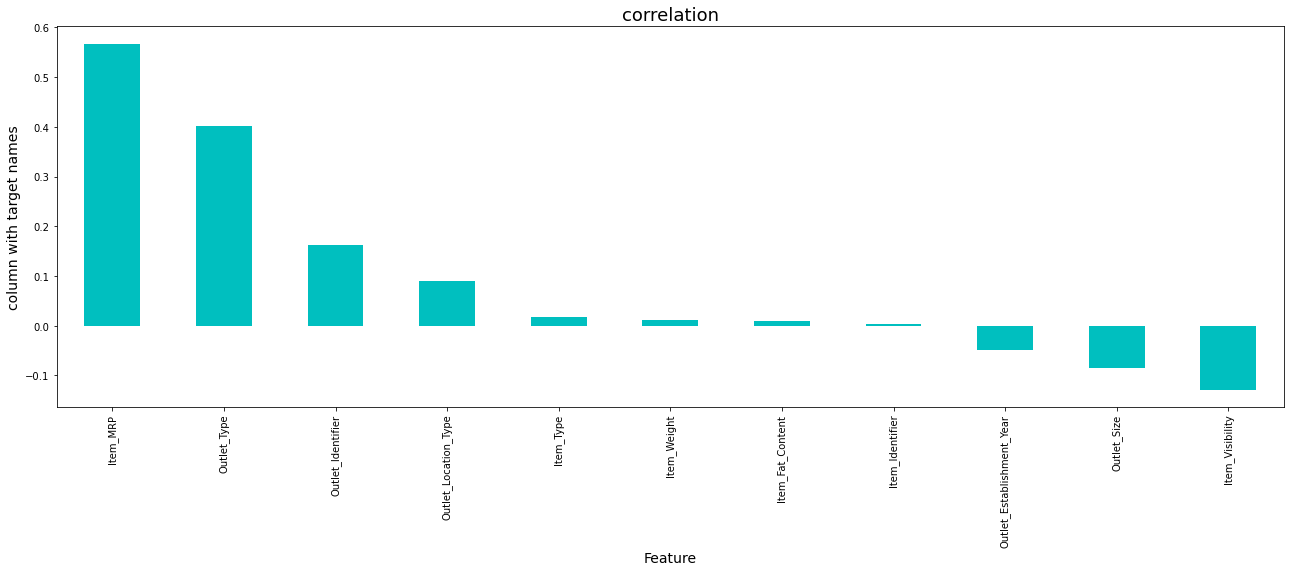

In [55]:
plt.figure(figsize=[22,7])
df.corr()['Item_Outlet_Sales'].sort_values(ascending=False).drop(['Item_Outlet_Sales']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

MRP is positively correlated with Item_sales and Outlet_size,Item_visibility and Outlet_Establishment_Year are negatively correlated.

# Data Distribution curve

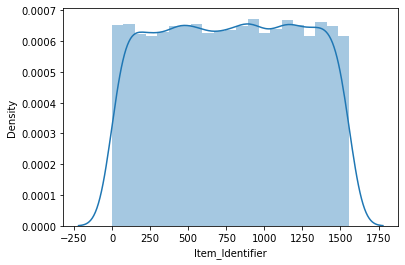

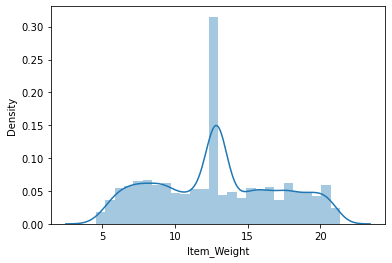

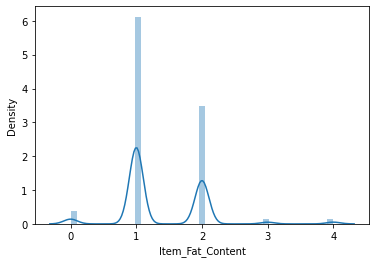

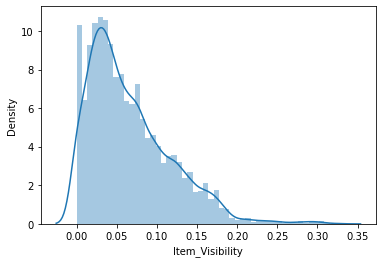

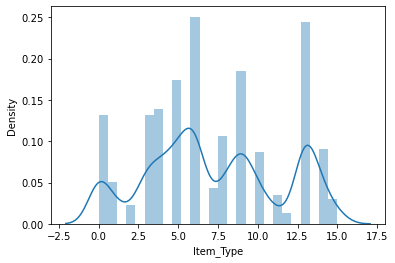

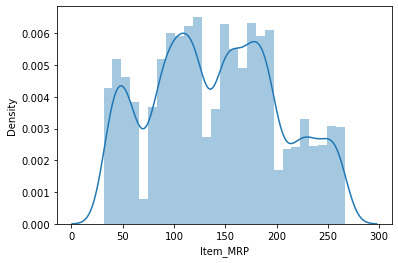

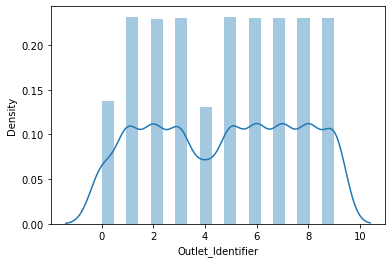

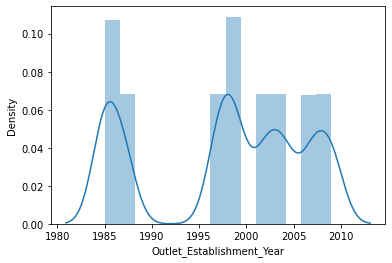

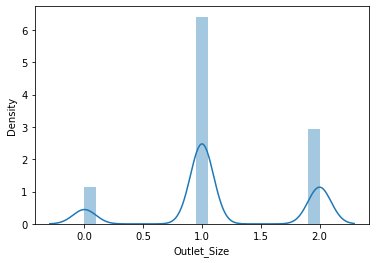

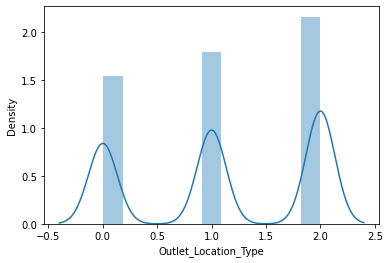

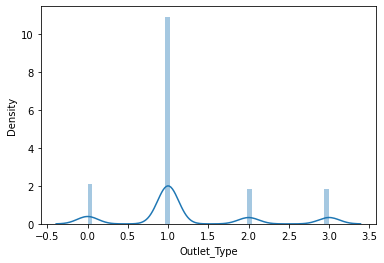

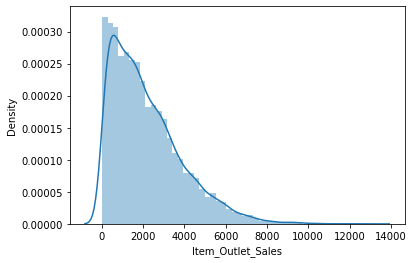

In [62]:
for i in df[columns]:
    sns.distplot(df[i])
    plt.show()

Data seems to be skewed in some columns

# Removing Outliers

In [63]:
from scipy.stats import zscore

In [64]:
z=np.abs(zscore(df))

In [65]:
df_new=df[(z<3).all(axis=1)]

In [67]:
print(df.shape)
print(df_new.shape)

(8523, 12)
(8222, 12)


Data loss is 3.5% which is acceptable

In [68]:
df=df_new

# Splitting the dataset

In [70]:
x=df.drop('Item_Outlet_Sales',axis=1)
y=df['Item_Outlet_Sales']

# Checking and removing the skewness

In [71]:
x.skew()

Item_Identifier             -0.011945
Item_Weight                  0.087821
Item_Fat_Content             0.291106
Item_Visibility              0.794506
Item_Type                    0.094578
Item_MRP                     0.139153
Outlet_Identifier           -0.067611
Outlet_Establishment_Year   -0.420927
Outlet_Size                 -0.089519
Outlet_Location_Type        -0.202794
Outlet_Type                  0.957163
dtype: float64

In [72]:
from sklearn.preprocessing import power_transform

In [73]:
df_x=power_transform(x)

In [74]:
df_x=pd.DataFrame(df_x,columns=x.columns)

In [76]:
df_x.skew()

Item_Identifier             -0.296537
Item_Weight                 -0.069934
Item_Fat_Content             0.017038
Item_Visibility              0.116318
Item_Type                   -0.166116
Item_MRP                    -0.112220
Outlet_Identifier           -0.215616
Outlet_Establishment_Year   -0.222552
Outlet_Size                 -0.044624
Outlet_Location_Type        -0.216697
Outlet_Type                  0.010506
dtype: float64

Skewness has been removed from all the columns

In [77]:
x=df_x

In [78]:
x.skew()

Item_Identifier             -0.296537
Item_Weight                 -0.069934
Item_Fat_Content             0.017038
Item_Visibility              0.116318
Item_Type                   -0.166116
Item_MRP                    -0.112220
Outlet_Identifier           -0.215616
Outlet_Establishment_Year   -0.222552
Outlet_Size                 -0.044624
Outlet_Location_Type        -0.216697
Outlet_Type                  0.010506
dtype: float64

In [85]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
dfn=sc.fit_transform(x)

In [86]:
dfn=pd.DataFrame(dfn,columns=x.columns)

In [88]:
x=dfn

# Finding the best random state

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [128]:
maxr2=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    lm.score(x_train,y_train)
    lm.score(x_test,y_test)
    ypred=lm.predict(x_test)
    acc=r2_score(y_test,ypred)
    if acc>maxr2:
        maxr2=acc
        maxRS=i
print('Best accuracy is',maxr2, 'for random state',maxRS)    

Best accuracy is 0.5445225446644593 for random state 6


In [130]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)
lm.fit(x_train,y_train)
pred_test=lm.predict(x_test)
print(r2_score(y_test,pred_test))

0.521349943744392


In [137]:
cv_score=cross_val_score(lr,x,y,cv=5)
print('Cross validation of Linear Regression is: ',cv_score.mean())

Cross validation of Linear Regression is:  0.5145481125542827


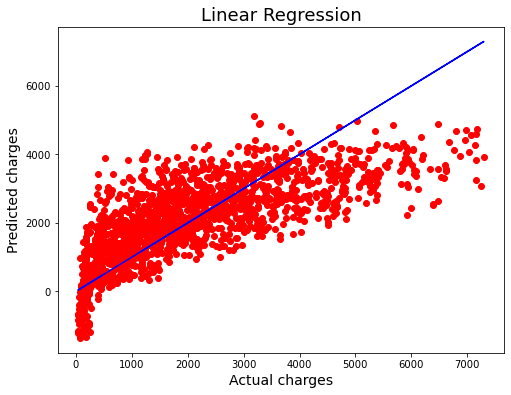

In [138]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual charges', fontsize=14)
plt.ylabel('Predicted charges', fontsize=14)
plt.title('Linear Regression', fontsize=18)
plt.show()

# Regularization

In [140]:
from sklearn.model_selection import GridSearchCV

In [141]:
from sklearn.linear_model import Lasso
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [142]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.5215110362200872

In [143]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.5145801713382714

# Ensemble Technique

In [144]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rfpred=rf.predict(x_test)
print(r2_score(y_test,rfpred))

rfcvscore=cross_val_score(rf,x,y,cv=5)
print('Cross Validation score for Random Forest regressor is',rfcvscore.mean())

0.5426260858836679
Cross Validation score for Random Forest regressor is 0.5375634902033806


We are getting model accuracy as 54% and cross validation  as 53 % as we have not taken the test data

In [145]:
import pickle
filename='bigdatamart.pkl'
pickle.dump(rf,open(filename,'wb'))

In [146]:
loaded_model=pickle.load(open('bigdatamart.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.5426260858836679


In [147]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],rfpred[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1635,1636,1637,1638,1639,1640,1641,1642,1643,1644
Predicted,769.884514,2122.550426,3062.127386,717.825612,2315.166366,1631.163394,3859.529414,3653.990296,1468.162238,3142.203152,...,2660.30377,503.524566,1853.35417,859.84741,314.277574,1855.238384,3487.19408,2098.00238,2265.071574,260.574146
Original,769.884514,2122.550426,3062.127386,717.825612,2315.166366,1631.163394,3859.529414,3653.990296,1468.162238,3142.203152,...,2660.30377,503.524566,1853.35417,859.84741,314.277574,1855.238384,3487.19408,2098.00238,2265.071574,260.574146
